# __The Mathematics of Imaging__
> __Presenter__: Matthew Blackledge \
> Division of Radiotherapy and Imaging \
> Institute of Cancer Research

A quick introduction to the core mathematical ideas behind image acquisition and image processing.  These notes form the core materials for the course "Image theory, processing and perception" run by the joint department of Radiotherapty and Imaging at the Institute of Cancer Research and Royal Marsden Hostpial in London, UK

- These slides are __interactive!__ You can use an IPython/Jupyter notebook to try this for yourself. (If you don't know Python then don't worry, it is used here to demonstrate the core principles)

- We cannot cover everything.  Imaging is a large field and still a very active area of research.

___Slide availability___: These slides are available on my GitHub page: https://github.com/mdblackledge/theoryofimaging

You can open this Notebook within Google Colab using the following link.  This will assume that you have a Google account!
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mdblackledge/theoryofimaging/blob/main/Lecture_1/Lecture1.ipynb)

___Acknowledgements___: The content of this course is _hugely_ inspired by the fantastic work of Mike Patridge who delivered this course prior to 2018

___Copyright___: Matthew Blackledge 2022

# __Contents__


__Lecture 1__<br>
_Image formation_<br>
 > 1.1 Representation of Images<br>
 > 1.2 Convolution<br>
 > 1.3 Fourier Theory<br>

__Lecture 2__<br>
_Describing Imaging Systems_<br>
 > 2.1 Linear Systems<br>
 > 2.2 Point Spread Function<br>
 > 2.3 Shift Invariance<br>
 > 2.4 Separability<br>
 > 2.5 Transfer Functions<br>

_Sampling Theory_<br>
 > 2.6 The Comb and Rectangle Functions<br>
 > 2.7 Finite Apertures and Sampling Rates<br>
 > 2.8 Nyquist-Shannon Theory<br>
 > 2.9 Aliasing<br>
 > 2.10 Pre-Sample Blurring<br>

__Lecture 3__<br>
_Image Enhancement and Filtering_<br>
 > 3.1 Point Operators<br>
 > 3.2 Spatial Operators<br>
 > 3.3 Transform Operators<br>

_Noise_<br>
 > 3.4 Noise Distributions<br>
 > 3.5 Noise Filtering<br>
 > 3.6 Practical Considerations of Noise<br>

# _0.1 Useful Resources_

Some useful books upon which these notes are based.


<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/GonzalezBook.jpg?raw=true" width=200/>

__Digital Image Processing__,<br>_R. C. Gonzales and R. E. Woods, Pearson_.<br>
Good for learning about classical image processing ideas such as morphological operations, image smoothing, edge detection and so on.

---

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/WebbBook.jpg?raw=true" width=200/>

__Webb's Physics of Medical Imaging__,<br>_M. A. Flower (Ed.), CRC Press._<br> Good for understanding of the core concepts of medical image acquisition, covering a range of modalities including MRI, CT, ultrasound and nuclear medicine.

---

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/YooBook.jpg?raw=true" width=200/>

__Insight Into Images__, _T. S. Yoo (Ed.), ITK_ <br>
Covers one of the most import software libraries for contemporary image processing (image segmentation and registration)

---

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/BlackledgeBook.jpg?raw=true" width=200/>

__Digital Image Processing__, _J. M. Blackledge, Woodhead Publishing_ <br>
A rigourous mathematical explanation behind some of the techniques that are covered in this course. 

---

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/BookLangtangen.jpg?raw=true" width=200/>

__A Primer on Scientitifc Programming with Python__, _H. P. Langtangen, Springer_ <br>
Helpful for those not familiar with some of the concepts of Python programming with a focaus on scientific application. 

# _0.2 A brief history of imaging_

Based on material in: Mait, J. N. (2006). <br>A History of Imaging: Revisiting the Past to Chart the Future. Optics and Photonics News, 17(2), 22

### 750-0 BCE

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/NimrudLens.jpg?raw=true" width=300/>

The "Nimrud Lens" is an example of a lens used in the Ayssirian Empire... perhaps used as a magnifying glass or to start fires?

### 300 BCE

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/euclid.jpg?raw=true" width=300/>

Around 300 BCE Euclid writes "Optics", the earliest known text on the mathematics of vision
 - angle of reflection = angle of incidence  

### 1270

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/glasses.jpg?raw=true" width=300/>

 - Eye glasses first invented in Italy.
 - Glass making was moved to the island of Murano (Venice).
 - Kept a closely guarded secret for almost 300 years.

### Ca. 1610

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/galileo_complete.jpg?raw=true" width=300/>

 - First telescope patent in 1608 by Hans Lippershey
 - In 1609, Gailileo Galilei improves the design and uses it to observe the rings of Saturn for the first time.

### 1611-1612

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/kepler_neri.jpg?raw=true" width=300/>

 - Johannes Kepler and Antonio Neri publish books on basic optics and manufacture of high quality glass.
 - This puts the Venetians out of business!

### 1621

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/snell.jpg?raw=true" width=200/>

 - Snell derives the law of refraction.
 - This proves to be the key for more accuracte lens design (Descartes figures out how to remove spherical abberations).

### Ca. 1670

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/newton.jpg?raw=true" width=500/>

 - Newton provides an understanding of the distance an image will be projected through a lens with focal distance, $f$.
 - Also makes many advances in the understanding of light, including the fact that white light is composed of different colours.
 - He asserts that light is made up of __particles__.


### Ca. 1800
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/young.jpg?raw=true" width=500/>

 - Thomas Young re-establishes the theory of light as a <b>wave</b> through his interference and double-slit experiments.


### 1865
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/maxwell.jpg?raw=true" width=400/>

 - Maxwell publishes "A Dynamical Theory of the Electromagnetic Field", which unifies the laws of electromganetism and demonstrates the mathematical principles of light as a wave of the EM-field.
 - Using his framework, derives the speed of light in a vacuum, $c$: the maximum speed at which matter and infromation can travel.


### 1830-1840
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/Daguerre.jpg?raw=true" width=500>

 - Daguerre introduces the "Daguerreotype", the first popular monochrome phtoraphic method.
 - Captures images on a polished silver-surfaced plate, and primrily used for portraits.

### 1855
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/maxwell_RGB.jpg?raw=true" width=500/>

 - While studying the psychology of color, Maxwell proposes that a color image could be made by combining monochrom images taken through reg, green and blue filters.
 -  These images were superimposed onto one another using three projectors with the same filters to create the first color photograph in 1861.
 - Largely forgotten for two decades, it would not be until 1907 that color photography would be commercialized.


### 1948
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/Shannon.jpg?raw=true" width=500/>

 - Focus had been on the storage and transmission of __analogue__ signals (e.g. for transmission of radio signal, telephone calls and storage of images) 
 - In 1948 Calude Shannon published his paper "A Mathematical Theory of Communication" in which he founded "_information theory_".
 - This included optimisation of methods for sending messages from place to another in the presence of noise __without loss of quality__.
 - Led to the invention of the information 'bit' and established __digital__ communication.

### 1957-
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/digital.jpg?raw=true" width=400>

 - First digital image stored on a computer in 1957.
 - Development of the CCD in 1969 meant that digital photgraphy could be acquired at source (now largely replaced by active pixel sensors - APS).
 - The increasing storage capacity of modern computers allows for easy storage of images.
 - The invention of the internet allows us to easily share these digital images worldwide.

### 2010s

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/AI.png?raw=true" width=200>

 - Increase in computational power, especially __graphical processing units (GPUs)__, allows for development of complex image analysis algorithms (primarily __deep learning__).
 - These algorithms are able to learn complex patterns from very large datasets
 - Aim to replicate complicated image tasks, mimicking the performance of the human brain 

# _0.3 Import relevant libraries_

Before we start, we need to install some python libraries to run the code.<br> Run the cell bellow to do this.

In [12]:
#@title
import os, wave

# Essential plotting and scientific libraries
import matplotlib.pyplot as pl
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np

# Fast Fourier transform
from numpy import fft

# Image i/o and resize functionality
from skimage.io import imread
from skimage.transform import resize

# IPython display imports for user interface elements.
import IPython
from ipywidgets import interact, FloatSlider, IntSlider, RadioButtons, Button, HBox, VBox
from IPython.display import Image, display, clear_output

# An example image we can use
from scipy.misc import face
face = face()

# 2D convolution
from scipy.signal import convolve2d

# Some useful sound files for later
if not os.path.exists("c_acoustic_loud.wav"):
  os.system("wget -O c_acoustic_loud.wav https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/c_acoustic_loud.wav?raw=true")
if not os.path.exists("c_classical_loud.wav"):
  os.system("wget -O c_classical_loud.wav https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/c_classical_loud.wav?raw=true")

# __1.1 Representation of Images__

## Pixel Space


- Thanks to technologies like the charge-couple device (CCD), images are now represented digitally through 'pixels'
 
 - The position of each pixel is represented in 2-dimensinal space by the indices $(j, i)$, which can be converted to real-space coordinates through knowledge of the __origin__ $(O_{x}, O_{y})$ and __resolution__ $(r_{x}, r_{y})$:<br><br>
 <center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pixels_.jpg?raw=true", width = 60%>
 </center>

  - In general we also need to think about the __orientation__, $\theta$, of the image with respect to real-space coordinates (however we chose them).<br><br>
 <center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pixels_full.jpg?raw=true", width = 60%>
 </center>

## Pixel Values

Image information is stored by assigning a numeric value to each pixel:

In [5]:
#@title
# Extract the red colour channel from the image
R_channel = face[::-1, :, 0]

zoom_slider = FloatSlider(min=1.00, max=70.0, step=1, value=1.0, continuous_update=False)

# decorate the plot function with an environment from the UIs:
@interact(zoom=zoom_slider)
def plot(zoom):
    fig = pl.figure(figsize = (13, 9))
    ax = fig.add_subplot(111)
    ax.imshow(R_channel, cmap = 'gray', interpolation = 'None', origin = 'upper')

    # Set the viewport to display a zoomed in version of the image
    zoom_factor = 1.0/zoom
    xRange = [int(face.shape[1] / 2 * (1 - zoom_factor)), int(face.shape[1] / 2 * (1 + zoom_factor))]
    yRange = [int(face.shape[0] / 2 * (1 - zoom_factor)), int(face.shape[0] / 2 * (1 + zoom_factor))]
    ax.set_xlim(*xRange)
    ax.set_ylim(*yRange)
    ax.set_xlabel('i'), ax.set_ylabel('j')

    # If the zoom factor is high enough then display the pixel values
    if zoom >= 50:
        for i in range(xRange[0]+1, xRange[1]):
            for j in range(yRange[0]+1, yRange[1]):
                if R_channel[j, i] < 100:
                    color = 'w'
                else:
                    color = 'k'
                ax.text(i, j, "%d"%R_channel[j, i],
                        verticalalignment = 'center', horizontalalignment = 'center', 
                        color = color, fontsize = 13)

    pl.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='zoom', max=70.0, min=1.0, s…

## Colour spaces

The pixel value might also represent the amount of 'red', 'green' and 'blue' in the image (so called RGB colour space)

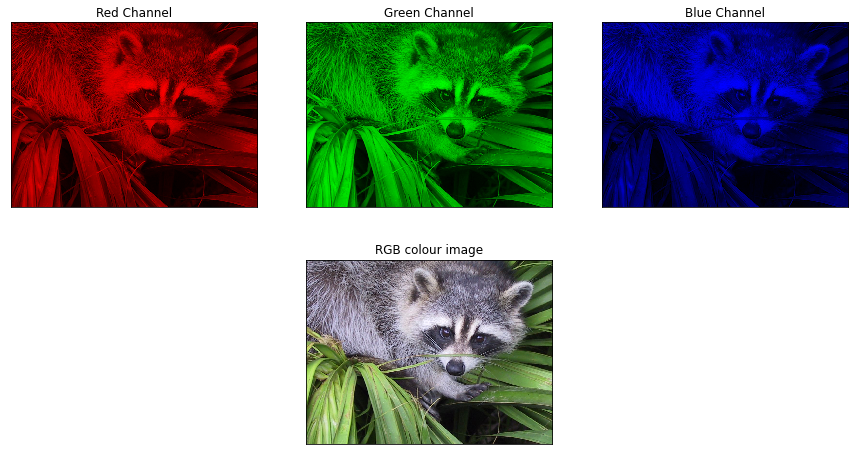

In [8]:
#@title
# Extract the red colour channel from the image
R_channel = face[:, :, 0]
G_channel = face[:, :, 1]
B_channel = face[:, :, 2]

# Cretate a red colormap
colors = [(0, 0, 0), (1, 0, 0)] # Black -> Red
cm_red = LinearSegmentedColormap.from_list("blackred", colors, N=256)

# Cretate a green colormap
colors = [(0, 0, 0), (0, 1, 0)] # Black -> Green
cm_green = LinearSegmentedColormap.from_list("blackgreen", colors, N=256)

# Cretate a blue colormap
colors = [(0, 0, 0), (0, 0, 1)] # Black -> Blue
cm_blue = LinearSegmentedColormap.from_list("blackblue", colors, N=256)

f = pl.figure(figsize = (15, 8))
ax1 = f.add_subplot(231)
ax1.imshow(R_channel, cmap = cm_red, interpolation = 'None')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Red Channel')

ax2 = f.add_subplot(232)
ax2.imshow(G_channel, cmap = cm_green, interpolation = 'None')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Green Channel')

ax3 = f.add_subplot(233)
ax3.imshow(B_channel, cmap = cm_blue, interpolation = 'None')
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('Blue Channel')

ax4 = f.add_subplot(235)
ax4.imshow(face, interpolation = 'None')
ax4.set_xticks([]), ax4.set_yticks([])
ax4.set_title('RGB colour image')

pl.show()

There are other colour spaces that are of worthy note:

#### __CMYK__
<center>
<img src = "https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/cmyk.png?raw=true" width=200><br>
</center>
Cyan, magenta, yellow and black are the colours used in some printing systems.

<!-- #### __RGB__
<center>
<img src = "https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/rgba.jpg?raw=true" width=200><br>
</center>
Most commonly used for displaying digital images using digital devices (e.g. computer monitors). -->

#### __HSV__
<center>
<img src = "https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/hsv.png?raw=true" width=200><br>
</center>
Designed to make colour mixing more interpretable by humans.

## The Alpha Channel

Sometimes it might be useful to define the 'transparency' of the image when overlaying on top of another. Transparency is quantified by $\alpha$:<br><br>
$$
I_{final} = (1-\alpha) \cdot I_{1} + \alpha \cdot I_{2}
$$

In [9]:
#@title
# Invert the image in the y-direction
face_inverse = face[::-1, :]

alpha_slider = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(alpha=alpha_slider)
def plot(alpha):

    fig = pl.figure(figsize = (9, 7))
    ax = fig.add_subplot(111)

    # Add the alpha channel.
    rgb_image = (1-alpha)*face + alpha*face_inverse

    # The image must be byte
    ax.imshow(rgb_image.astype('uint8'), origin = 'upper')
    pl.axis('off')
    pl.show()


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='alpha', max=1.0, step=0.01)…

It is also possible to change the alpha level for each pixel.  This results in RGBA colour spaces: <br><br>
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/rgba.jpg?raw=true" width=300>
</center>

Alpha-cahnnels can be used to overlay images on top of one another:

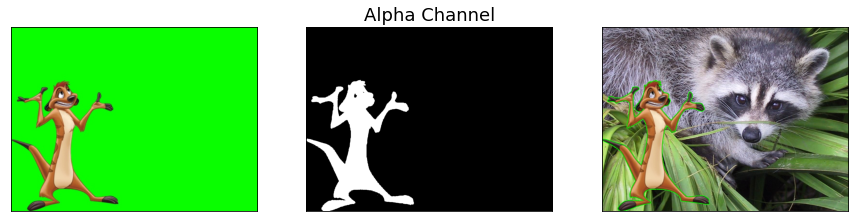

In [16]:
#@title
try:
  greenscreen = imread("greenscreen.jpg")
except:
  # Need to download
  !wget -O greenscreen.jpg https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/greenscreen.jpg?raw=true



# Add an alpha channel to the greenscreen - set to 255 to represent complete opacity
greenscreen = np.insert(greenscreen, 3, 255, axis = 2).astype('uint8')

f, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize = (15, 11))

ax1.imshow(greenscreen)
ax1.set_xticks([]), ax1.set_yticks([])

# Now set greenscreen areas alpha to 0
alpha = 255 * (greenscreen[:, :, 1] < 245)
greenscreen[:, :, -1] = alpha.astype('uint8')

ax2.imshow(greenscreen[:, :, 3], cmap = 'gray')
ax2.set_title('Alpha Channel', fontsize = 18.0)
ax2.set_xticks([]), ax2.set_yticks([])

ax3.imshow(face)
ax3.imshow(greenscreen)
ax3.set_xticks([]), ax3.set_yticks([])

pl.show()

# __1.2 Convolution__

## Dirac Delta Function

 - A function introduced by Paul Dirac to describe a point-function or point-mass for use in theoretical physics.<br>
 - Forms a cornerstone in the mathematics of signal and image processing.<br>
 - The Delta function, $\delta(x)$ is defined as:
 $$
 \delta(x) = \begin{cases} +\infty,\ x = 0\\\quad 0,\ \text{otherwise}\end{cases}, \qquad \int\limits_{-\infty}^{\infty}\delta(x)\text{d}x = 1
 $$
</ul>

__Properties__:
 - $f(0) = \int\limits_{-\infty}^{\infty}f(x)\delta(x)\text{d}x$<br><br>
 - $f(a) = \int\limits_{-\infty}^{\infty}f(x)\delta(x - a)\text{d}x\quad$('sifting' property)<br><br>
 - $\delta(\alpha x) = \frac{\delta(x)}{|\alpha|}$<br><br> 
 - $\delta(-x) = \delta(x)$

<center>
<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/delta_func.jpg?raw=true" width=500>
</center>

## Convolution Theory

 - Consider a point light source emitted through a 'pinhole camera' with finite aperture, and then projected onto a screen behind<br>
 - The resultant image, $h(x, y)$, is the __impulse response function__ of this camera.
<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pinhole_projection.jpg?raw=true" width=500>
</center>

 - What would happen if there were multiple point sources?<br>
 - Rather than a true representation of the point sources, we have multiple circular regions that appear to overlap with one another - the image is a 'smeared' representation of the source.<br>
 - Moreover, if each point source has a different 'brightness', distributed as $f(x, y)$, then final image will be a weighted sumation of the impulse responses.<br>
 - In general we have
   $$
     g(x, y) = \sum\limits_{m = 1}^{M}\sum\limits_{n = 1}^{N} f(x_{m}, y_{n})\cdot h(x - x_{m}, y - y_{n})
   $$<br>
 - Or in the continuous limit $N \rightarrow \infty$ and $M \rightarrow \infty$:
  $$
      g(x, y) = \iint\limits_{-\infty}^{\infty}h(x - \phi, y - \theta)f(\phi, \theta)\text{d}\phi\text{d}\theta
  $$

<center>
    <img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/pinhole_projection_multiple.jpg?raw=true" width=500>
</center>
<br>

 - This is a process is described by the __convolution__ of one function, $a$, with another, $b$:
$$
  a(x) \circledast b(x) = \int\limits_{-\infty}^{\infty}a(x-\phi)b(\phi)\text{d}\phi = \int\limits_{-\infty}^{\infty}b(x-\phi)a(\phi)\text{d}\phi
$$

In [21]:
#@title
convolution_slider = FloatSlider(min=0.0, max=0.8, step=0.01, value=0.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(x=convolution_slider)
def convolve_demo(x):
    
    theta = np.linspace(0, 1, 1000)

    a = 1.0 * (theta < 0.2)
    b = 10 * theta - 4
    b[int(theta.size/2)::] = b[int(theta.size/2):0:-1]
    b[b<0] = 0
    
    fig = pl.figure(figsize = (12, 5))
    ax1 = fig.add_subplot(121)
    ax1.plot(theta, np.roll(a, int(x*1000)), 'r-', label =  r'a($\phi$)')
    ax1.plot(theta, b, 'b-', label = r'b($\phi$)')
    ax1.set_xlabel(r'$\phi$', fontsize = 20.0)
    pl.legend(loc = 1, fontsize = 20.0)

    c = np.zeros(len(theta))
    for i in range(int(x*1000)):
        c[i+100] = np.sum(np.roll(a, i) * b)
        
    ax2 = fig.add_subplot(122)
    ax2.plot(theta, c, 'g-', label = 'c(x)')
    ax2.plot([x + 0.1], c[int(x*1000) + 99], 'go', ms = 15.0, label = 'Current c(x)')
    pl.legend(loc = 1, fontsize = 20.0)
    ax2.set_xlabel('x', fontsize = 20.0)
    ax2.set_ylim((0, 110))
    pl.show()
    

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=0.8, step=0.01), Ou…

 - Convolution can be applied in two or more dimensions:
\begin{align}
a(x, y)\circledast b(x, y) &= \iint\limits_{-\infty}^{\infty} a(x-\phi, y-\theta)b(\phi, \theta)\text{d}\phi\text{d}\theta \quad \text{(Continuous)}\\
a[i, j]\otimes b[i, j] &= \sum\limits_{m=1}^{M}\sum\limits_{n=1}^{N}a[i-m, j-n]\cdot b[m, n] \quad \text{(Discrete)}
\end{align}<br>
 - For example, convolving a disk with our example image tends to 'smooth-out' the final result.

In [24]:
#@title
# Convert the red-channel of the 'face' to a floating point array (value 0 to 1):
face_R = face[:, :, 0].astype('float32')/255

disk_radius_slider = FloatSlider(min=1, max=20, step=1, value=1.0, continuous_update=False)
    
# decorate the plot function with an environment from the UIs:
@interact(disk_radius=disk_radius_slider)
def convolute_disk(disk_radius):
    
    face_ds = face_R[0::3, 0::3]
    
    # convolve with a disk of varying radius
    x = np.linspace(-1, 1, 40)
    X, Y = np.meshgrid(x, x)
    
    disk = 1.0*(X**2 + Y**2 < (disk_radius / 20)**2)
    
    f = pl.figure(figsize = (12, 7))
    ax1 = f.add_subplot(131) 
    ax1.imshow(disk, cmap = 'gray', clim = (0, 1), interpolation = 'None')
    ax1.set_title('a(x)', fontsize = 15.0)
    
    ax2 = f.add_subplot(132)
    ax2.imshow(face_ds, cmap = 'gray', interpolation = 'None')
    ax2.set_title('b(x)', fontsize = 15.0)
    
    ax3 = f.add_subplot(133)
    ax3.imshow(convolve2d(face_ds, disk), cmap = 'gray', interpolation = 'None')
    ax3.set_title('c(x)', fontsize = 15.0)
    
    pl.tight_layout()
    pl.show()


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='disk_radius', max=20.0, min…


 - Note that the functions can be anything we like:

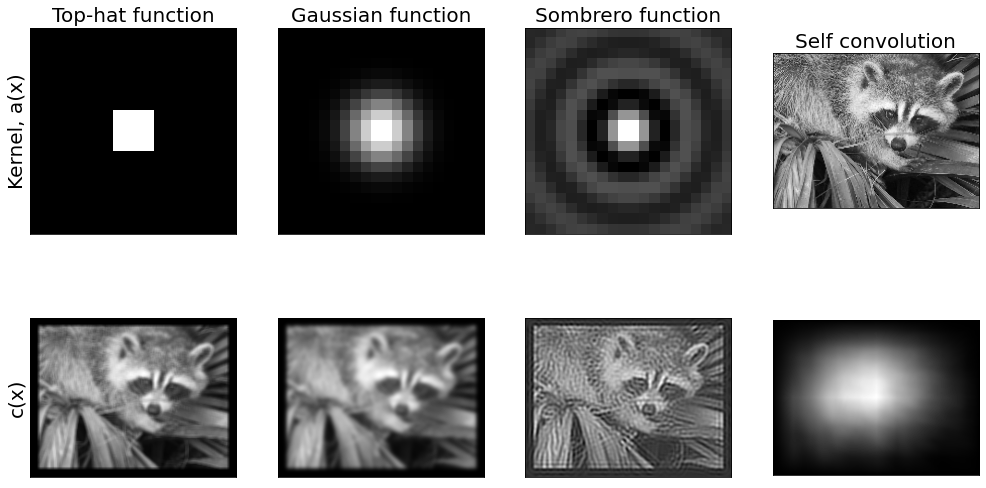

In [26]:
#@title
def demo_convolutions():

    x = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, x)

    f = pl.figure(figsize = (17, 9))
    
    face_ds = face_R[0::5, 0::5]

    # top-hat function
    kernel = 1 * np.logical_and(np.abs(X) < 0.2, np.abs(Y) < 0.2)
    ax = f.add_subplot(241)
    ax.set_ylabel('Kernel, a(x)', fontsize = 20)
    ax.set_title('Top-hat function', fontsize = 20)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])

    ax = f.add_subplot(245)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_ylabel('c(x)', fontsize = 20)

    # Gaussian function
    variance = 0.05
    kernel = 1.0 / (2 * np.pi * variance) * np.exp(-0.5 * (X**2 + Y**2) / variance)
    ax = f.add_subplot(242)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Gaussian function', fontsize = 20)

    ax = f.add_subplot(246)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])

    # Sinc/sombrero function
    r = np.sqrt(X**2 + Y**2)
    kernel = np.sinc(4*r)
    ax = f.add_subplot(243)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Sombrero function', fontsize = 20)

    ax = f.add_subplot(247)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])


    # self-convolution
    kernel = face_ds
    ax = f.add_subplot(244)
    ax.imshow(kernel, cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title('Self convolution', fontsize = 20)

    ax = f.add_subplot(248)
    ax.imshow(convolve2d(face_ds, kernel), cmap = 'gray')
    ax.set_xticks([]), ax.set_yticks([])
    
    pl.show()

demo_convolutions()


# __1.3 Fourier Theory__

## Motivation

 - Diverting from images for the moment, let's think about what makes up different sounds.
 - Sound is propagated through a meterial such as air through a series of __compression waves__. The air is made to compress and refract, and this transfers energy from the object causing the waves to your ear so that you hear a sound.
 - The __frequency__, $\nu$, of the sound wave is what causes you to hear a different __pitch__.
 - The __amplitude__ of the sound wave changes the __intensity__ (or volume) of the sound.

<img src="https://github.com/mdblackledge/theoryofimaging/blob/main/Lecture_1/images/wave_example.jpg?raw=true" width=600/>


## Examples of sounds waves

### Single frequency

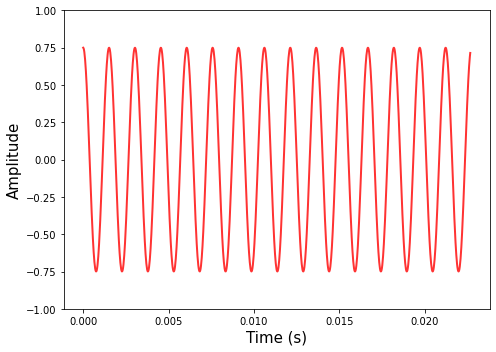

In [80]:
#@title
frequency = 660    # in Hz
amplitude = 0.75   
duration = 3       
frame_rate = 44100

time = np.linspace(0, duration, frame_rate * duration)
wave = amplitude * np.cos(time * 2 * np.pi * frequency)

# IPython seems to normalise the signal and amplitude is no-op
# Adding a ref channel to force this effect.
wave_ref = np.cos(time * 2 * np.pi * 20000)

# Display the results
fig = pl.figure(figsize = (7, 5))
ax = fig.add_subplot(111)
ax.plot(time[0:1000], wave[0:1000], color='r', lw=2, alpha=0.8)
ax.set_xlabel('Time (s)', fontsize = 15.0)
ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
pl.tight_layout()
pl.show()

IPython.display.Audio([wave, wave_void], rate=frame_rate,)

### Two frequencies

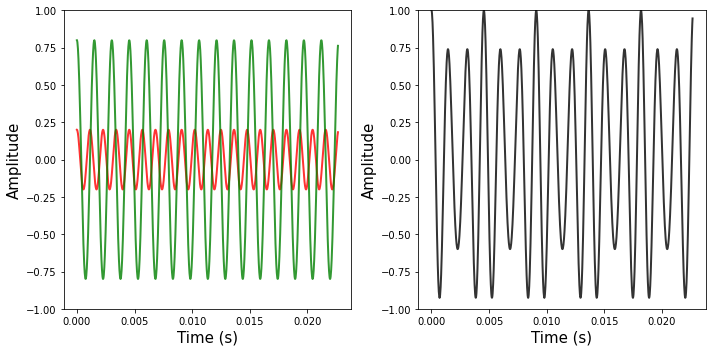

In [83]:
#@title
frequency_1 = 880    # in Hz
frequency_2 = 660    # in Hz
amplitude_1 = 0.2
amplitude_2 = 1.0 - amplitude_1   
duration = 3       
frame_rate = 44100

time = np.linspace(0, duration, frame_rate * duration)
wave_1 = amplitude_1 * np.cos(time * 2 * np.pi * frequency_1)
wave_2 = amplitude_2 * np.cos(time * 2 * np.pi * frequency_2)
wave = wave_1 + wave_2

# Display the results
fig = pl.figure(figsize = (10, 5))
ax = fig.add_subplot(121)
ax.plot(time[0:1000], wave_1[0:1000], color='r', lw=2, alpha=0.8)
ax.plot(time[0:1000], wave_2[0:1000], color='g', lw=2, alpha=0.8)
ax.set_xlabel('Time (s)', fontsize = 15.0)
ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
ax = fig.add_subplot(122)
ax.plot(time[0:1000], wave[0:1000], color='k', lw=2, alpha=0.8)
ax.set_xlabel('Time (s)', fontsize = 15.0)
ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
pl.tight_layout()
pl.show()

IPython.display.Audio(wave, rate=frame_rate)

### Three Frequencies Combined
The ear can be good at depicting different frequencies, but is can be difficult to identify these visually.

In [85]:
#@title
frequency_1 = 880    # in Hz
frequency_2 = 470    # in Hz
frequency_3 = 440    # in Hz
amplitude_1 = 0.2
amplitude_2 = 0.2
amplitude_3 = 1.0 - amplitude_1 - amplitude_2  
duration = 3       
frame_rate = 44100

time = np.linspace(0, duration, frame_rate * duration)
wave_1 = amplitude_1 * np.cos(time * 2 * np.pi * frequency_1)
wave_2 = amplitude_2 * np.cos(time * 2 * np.pi * frequency_2)
wave_3 = amplitude_3 * np.cos(time * 2 * np.pi * frequency_3)
wave = wave_1 + wave_2 + wave_3

# Display the results
fig = pl.figure(figsize = (10, 5))
ax = fig.add_subplot(121)
ax.plot(time[0:1000], wave_1[0:1000], color='r', lw=2, alpha=0.8)
ax.plot(time[0:1000], wave_2[0:1000], color='g', lw=2, alpha=0.8)
ax.plot(time[0:1000], wave_3[0:1000], color='b', lw=2, alpha=0.8)
ax.set_xlabel('Time (s)', fontsize = 15.0)
ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
ax = fig.add_subplot(122)
ax.plot(time[0:1000], wave[0:1000], color='k', lw=2, alpha=0.8)
ax.set_xlabel('Time (s)', fontsize = 15.0)
ax.set_ylabel('Amplitude',  fontsize = 15.0), ax.set_ylim((-1, 1))
pl.tight_layout()
pl.show()

IPython.display.Audio(wave, rate=frame_rate)

### Many frequencies combined

 - When multiple frequencies are combined, different sounds are produced.  This is why muscial instuments that play the same note sound different to each other.
 - For example, when middle C is plucked on a classical guitar, it sounds quite different to an acoustic guitar. 
 - Although the same note is played, the shape of the guitar body, the string material, the wood used, and the way the string is plucked add other frequencies to the main harmonic that give the instrument its characteristic sound: 

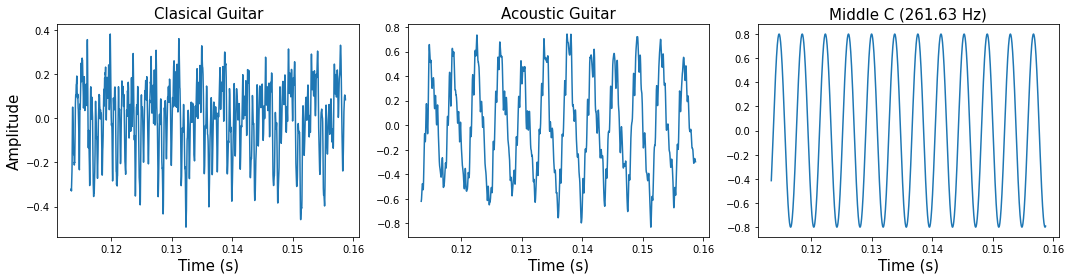

Classical guitar


Acoustic guitar


Middle C


In [19]:
#@title
def get_waveform(wav_file):
    """ Extract a numpy array waveform from a wav file
    """
    wav = wave.open(wav_file, 'rb')
    wf = wav.readframes(-1)
    wf = np.frombuffer(wf, 'int16')
    t = np.arange(len(wf)).astype('float') / wav.getframerate()
    return t, np.array(wf).astype('float') / 32767.0, wav.getframerate()

fl_classical = "c_classical_loud.wav"
fl_acoustic = "c_acoustic_loud.wav"

t_classical, wf_classical, framerate_classical = get_waveform(fl_classical)
t_acoustic, wf_acoustic, framerate_acoustic = get_waveform(fl_acoustic)
wf_middle_c = np.cos(t_acoustic * 261.63 * 2 * np.pi)*0.8

idx = range(5000, 7000)
f = pl.figure(figsize = (15, 4))

ax = f.add_subplot(131)
ax.plot(t_classical[idx], wf_classical[idx])
ax.set_title('Clasical Guitar', fontsize = 15), ax.set_ylabel('Amplitude', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

ax = f.add_subplot(132)
ax.plot(t_acoustic[idx], wf_acoustic[idx])
ax.set_title('Acoustic Guitar', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

ax = f.add_subplot(133)
ax.plot(t_acoustic[idx], wf_middle_c[idx])
ax.set_title('Middle C (261.63 Hz)', fontsize = 15), ax.set_xlabel('Time (s)', fontsize = 15)

pl.tight_layout()
pl.show()

print("Classical guitar")
IPython.display.display(IPython.display.Audio("c_classical_loud.wav"))
print("Acoustic guitar")
IPython.display.display(IPython.display.Audio("c_acoustic_loud.wav"))
print("Middle C")
IPython.display.display(IPython.display.Audio(wf_middle_c, rate=framerate_acoustic))


## Mathematics of Fourier theory

So how do we find out which frequencies are present? <br>
This is the motivation behind __Fourier Theory__: to determine the combination of waves (frequencies and amplitudes) that make up a signal, whether this be in the temporal domain (sounds) or spatial domain (images).

### Mathematical Definitions

 - The "inner product" of two functions, $f_{1}$ and $f_{2}$, over the interval $[a, b]$ is given by:
 $$
 \langle f_{1}, f_{2}\rangle = \int\limits_{a}^{b}f_{1}(t)f_{2}(t)\text{d}t
 $$
 - Two functions, $e_{1}$ and $e_{2}$, are considered __orthogonal__ if $\langle e_{1}, e_{2}\rangle$ = 0 <br><br>
 - An __orthonormal collection__ is a set of functions $\{e_{1}, e_{2}, \dots, e_{n}\}$ over the interval $[a, b]$ such that:
 $$
 \langle e_{i}, e_{j}\rangle = 
 \begin{cases}
 0,\qquad \text{if } i \neq j\\
 1,\qquad \text{if } i = j\\
 \end{cases}
 $$

### Orthogonal Cosine and Sine Functions


Consider two functions $e_{m}(t) = \cos(m x)$ and $e_{n}(t) = \cos(n x)$ over the interval $[-\pi, \pi]$, where $m, n \in \{0, 1, 2, 3, \dots\}$:<br><br>
\begin{align}
\langle e_{m}, e_{n}\rangle &= \int\limits_{-\pi}^{\pi} \cos(m t)\cos(n t)\text{d}t\\
&= \int\limits_{-\pi}^{\pi} \frac{1}{2}\left\{ \cos([m+n] t) + \cos([m-n] t)\right\} \text{d}t \\
&= \frac{1}{2}\left[\frac{1}{[m+n]}\sin([m+n] t) \right]_{-\pi}^{\pi} + \frac{1}{2}\left[\frac{1}{[m-n]}\sin([m-n] t) \right]_{-\pi}^{\pi}
=
\begin{cases}
0,\ \qquad \text{if } m \neq n \\
\pi,\ \qquad \text{if } m = n \neq 0 \\
2\pi,\qquad \text{if } m = n = 0
\end{cases}
\end{align}

Equvalently, we can also find:
\begin{align}
\int\limits_{-\pi}^{\pi}\sin(mt)\sin(nt) =
\begin{cases}
0, \qquad \text{if } m \neq n \\
\pi, \qquad \text{if } m = n \neq 0 \\
0,\qquad \text{if } m = n = 0
\end{cases}
\end{align}
and
\begin{align}
\int\limits_{-\pi}^{\pi}\sin(mt)\cos(mt) = 0
\end{align}
so that the following is an __orthogonal set__ of functions:<br><br>
$$\left\{1, \cos(t), \sin(t), \cos(2t), \sin(2t), \cos(3t), \sin(3t), \dots\right\}$$

### Fourier Series

Consider now an arbitrary function $f(t)$ on the interval $[-\pi, \pi]$, and write it as a weighted summation of these trignometric __basis functions__:<br><br>
$$
f(t) = \frac{a_{0}}{2} + a_{1}\cos(t) + b_{1}\sin(t) + a_{2}\cos(2t) + b_{2}\sin(2t) + \dots
$$<br>
How do we find the coefficients $a_{0}, a_{1}, b_{1}, \dots$?

We can use the fact that these basis functions are orthogonal. <br>For example:
\begin{gather*}
\int\limits_{-\pi}^{\pi}\cos(2t)\cdot f(t)\text{d}t = \int\limits_{-\pi}^{\pi}\cos(2t)\cdot \left(\frac{a_{0}}{2} + a_{1}\cos(t) + b_{1}\sin(t) + a_{2}\cos(2x) + b_{2}\sin(2t) + \dots\right)\text{d}t \\
= \frac{a_{0}}{2}\int\limits_{-\pi}^{\pi}\cos(2t)\text{d}t + a_{1}\int\limits_{-\pi}^{\pi}\cos(2t)\cos(t)\text{d}t + b_{1}\int\limits_{-\pi}^{\pi}\cos(2t)\sin(t)\text{d}t + \\a_{2}\int\limits_{-\pi}^{\pi}\cos(2t)\cos(2t)\text{d}t + b_{2}\int\limits_{-\pi}^{\pi}\cos(2t)\sin(2t)\text{d}t + \dots \\
= 0 + 0 + 0 + a_{2}\cdot\pi + 0 + \dots
\end{gather*}<br><br>
And so we can find $a_{2}$ by:
$$
a_{2} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\cos(2t)f(t)\text{d}t
$$
The __Fourier Series__ of a function $f(t)$ where $t \in [-\pi, \pi]$ is thus an expansion over the orthogonal set trignometric functions:<br><br>
$$
f(t) = \frac{a_{0}}{2} + \sum\limits_{n=1}^{\infty}\left(a_{1}\cos(nt) + b_{n}\sin(nt)\right)
$$
where,
\begin{align}
a_{0} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi} f(t)\text{d}t, \qquad a_{n} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi} \cos(nt)\cdot f(t)\text{d}t, \qquad b_{n} = \frac{1}{\pi}\int\limits_{-\pi}^{\pi} \sin(nx)\cdot f(t)\text{d}t
\end{align}

### Fourier Series Examples

Consider the function $f(t) = t^{2}$ over the interval $[-\pi, \pi]$.  We have that:
\begin{align}
\frac{a_{0}}{2} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}t^{2}\text{d}t = \frac{1}{3}\pi^{2} \\
a_{n} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\cos(nt)t^{2}\text{d}t = (-1)^{n}\frac{4}{n^{2}}\\
b_{n} &= \frac{1}{\pi}\int\limits_{-\pi}^{\pi}\sin(nt)t^{2}\text{d}t = 0
\end{align}


Therefore,
$$
t^{2} \approx \frac{1}{3}\pi^{2} - 4\cos(t) + \cos(2t) - \frac{4}{9}\cos(3t) + \frac{1}{4}\cos(4t) - \frac{4}{25}\cos(5t) + \dots
$$

In [22]:
#@title
print("Number of terms:")
n_slider = IntSlider(min=0, max=20, step=1, value=0.0, description = '', continuous_update=False)

@interact(n=n_slider)
def plot_fourier_series(n):
    
    t = np.linspace(-np.pi, np.pi, 1000)
    f = t**2
    
    f_est = np.repeat(1.0/3 * np.pi**2, t.size)
    
    for n_ in range(1, n+1):
        f_est = f_est + (-1)**n_ * 4.0 / n_**2 * np.cos(n_*t)
    
    fig = pl.figure(figsize = (11, 5))
    ax = fig.add_subplot(121)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$t^{2}$')
    ax.plot(t, f_est, color='r', lw=5, alpha=0.8, label = r'Estimate of $t^{2}$')
    ax.set_xlabel('t', fontsize = 15), ax.set_ylim((-1, 11))
    pl.legend(loc = 1, fontsize = 15)
    
    ax = fig.add_subplot(122)
    ax.plot(t, f_est - f, color='r', lw=5, alpha=0.8, label = r'Difference')
    ax.set_xlabel('t', fontsize = 15)
    pl.legend(loc = 1, fontsize = 15), ax.set_ylim((-3, 3))
    pl.tight_layout()
    pl.show()


Number of terms:


interactive(children=(IntSlider(value=0, continuous_update=False, description='n', max=20), Output()), _dom_cl…

### Arbitrary Intervals

If a different interval is required, say $[-p, p]$, this can be achieved through a change of variables $t = \frac{\pi}{p}\tau$:<br><br>
\begin{align}
f(\tau) = \frac{a_{0}}{2} + \sum\limits_{n=1}^{\infty}a_{n}\cos\left(\frac{n\pi\tau}{p}\right) + b_{n}\sin\left(\frac{n\pi\tau}{p}\right)
\end{align}
where, 
\begin{align}
a_{0} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\text{d}\tau, \qquad a_{n} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\cos\left(\frac{n\pi\tau}{p}\right)\text{d}\tau, \qquad b_{n} = \frac{1}{p}\int\limits_{-p}^{p}f(\tau)\sin\left(\frac{n\pi\tau}{p}\right)\text{d}\tau
\end{align}

### Complex Fourier Series

It is possible to simplify the Fourier series using Euler's formula: $e^{i\theta} = \cos(\theta) + i\sin(\theta)$<br><br>
$$
\cos\left(\frac{n\pi\tau}{p}\right) = \frac{1}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) + \exp\left(-\frac{in\pi\tau}{p}\right)\right],\qquad \sin\left(\frac{n\pi\tau}{p}\right) = -\frac{i}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) - \exp\left(-\frac{in\pi\tau}{p}\right)\right]
$$
and so:
\begin{align}
f(\tau) &= \frac{a_{0}}{2} + \sum\limits_{n = 1}^{\infty} \frac{a_{n}}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) + \exp\left(-\frac{in\pi\tau}{p}\right)\right] -\frac{ib_{n}}{2}\left[\exp\left(\frac{in\pi\tau}{p}\right) - \exp\left(-\frac{in\pi\tau}{p}\right)\right] \\
&= \frac{a_{0}}{2} + \sum\limits_{n = 1}^{\infty} \frac{a_{n} - ib_{n}}{2}\exp\left(\frac{in\pi\tau}{p}\right) + \frac{a_{n} + ib_{n}}{2}\exp\left(-\frac{in\pi\tau}{p}\right)\\
&= \sum\limits_{n = -\infty}^{\infty} c_{n}\exp\left(\frac{in\pi\tau}{p}\right)
\end{align}
where, 
$$
c_{n} = \frac{1}{2p}\int\limits_{-p}^{p}f(\tau)\exp\left(-\frac{in\pi\tau}{p}\right)\text{d}\tau
$$

### Periodic Extension

What happens outside the range $[-p, p]$? 

We know that: <br><br>
$$
\exp\left(-\frac{in\pi\tau}{p}\right) = \exp\left(-\frac{in\pi\tau}{p}\right)\cdot\exp\left(-i2n\pi\right) = \exp\left(-\frac{in\pi(\tau+2p)}{p}\right)
$$<br>
and so the estimate will be periodic with period $2p$:


In [24]:
#@title
n_periodic_slider = IntSlider(min=0, max=40, step=1, value=0.0, description = 'n', continuous_update=False)

@interact(n=n_periodic_slider)
def plot_periodic_fourier_series(n):
    
    t = np.linspace(-4, 4, 5000)
    f = t
    
    f_est = np.repeat(0.0, t.size)
    
    for n_ in range(1, n+1):
        f_est = f_est + (-1)**(n_+1) * 2.0 / (n_*np.pi) * np.sin(n_*np.pi*t)
    
    fig = pl.figure(figsize = (7, 5))
    ax = fig.add_subplot(111)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$f(\tau) = \tau$')
    ax.plot(t, f_est, color='r', lw=5, alpha=0.8, label = r'Estimate of $f(\tau)$')
    ax.set_xlabel(r'$\tau$', fontsize = 15), ax.set_ylim((-2, 2))
    pl.legend(loc = 1, fontsize = 15)

interactive(children=(IntSlider(value=0, continuous_update=False, description='n', max=40), Output()), _dom_cl…

 - It is clear that the Fourier Series only approximates the function well over the period for which we have calculated the Fourier coefficients.<br>
 - We can improve the approximation by extending the period of the coefficient calculation:



In [29]:
#@title
# Define a slider that allows us to change p, the period of the fourier approximation
p_slider = FloatSlider(min=0.1, max=30, step=0.01, value=2.0, 
                     description = 'p', continuous_update=False)
n_slider_periodic_2 = IntSlider(min=0, max=40, step=1, value=0.0, description = 'number of terms', continuous_update=False)

@interact(p=p_slider, n=n_slider_periodic_2)
def plot_p_results(p, n):
    
    # Define the time over which to calculate te function
    t = np.linspace(-15, 15, 1000)

    # The true function
    f = t

    n_range = np.arange(-n, n+1, 1).astype('float')
    
    # Store the c_n values
    cn = []
    
    # Approximate the function using 
    f_est = np.zeros(len(t))
    for n_ in n_range:
        if not n_ == 0: 
            f_est = f_est + (-1)**(n_+1) * 1j * p / (n_*np.pi) * np.exp(-1j * n_ * np.pi * t / p)
            cn.append((-1)**(n_+1) * 1j * p / (n_ * np.pi))
        else:
            cn.append(0.0)
        
    cn = np.array(cn)
    
    fig = pl.figure(figsize = (12, 5))
    ax = fig.add_subplot(121)
    ax.plot(t, f, color='k', lw=5, alpha=0.8, label = r'$f(\tau) = \tau$')
    ax.plot(t, f_est.real, color='r', lw=5, alpha=0.8, label = r'Estimate of $f(\tau)$')
    ax.set_xlabel(r'$\tau$ (s)', fontsize = 15)
    ax.set_ylabel(r'f($\tau$)', fontsize = 15)
    pl.legend(loc = 1, fontsize = 15)
    
    ax = fig.add_subplot(122)
    ax.plot(n_range / (2*p), cn.imag, 'ro-', lw=1, alpha=0.8)
    ax.set_xlabel(r'$\xi$ = n / 2p (Hz)', fontsize = 15)
    ax.set_ylabel(r'C$_{n}$', fontsize = 15)
#     ax.set_xlim((-30, 30))
    
    pl.tight_layout()
    pl.show()

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='p', max=30.0, min=0.1, step…

 - So can we extend $p\rightarrow\infty$, so that we don't have to worry about the function being periodic?<br>
 - __Yes__!  But we have to consider the fact that $\xi$ = n / 2p becomes continuous.  <br>
 - Rather than a discrete $c_{n}$, we end up with a function F($\xi$) <br>
 - This leads to the __Fourier Transform__ pair that convert from temporal space (e.g. time $\tau$, or spatial position $x$) to frequency space ($\xi$) and vice-versa:
\begin{align}
F(\xi) = \text{FT}\{f(\tau) \} = \int\limits_{-\infty}^{\infty}f(\tau)e^{i2\pi\xi\tau}\text{d}\tau\\
f(\tau) = \text{FT}^{-1}\{F(\xi) \} = \int\limits_{-\infty}^{\infty}F(\xi)e^{-i2\pi\xi\tau}\text{d}\xi
\end{align}

### Fourier Transform

 - For our application (images), it is important to know that the Fourier transform can be applied in more than one dimension:<br><br>
\begin{align}
f(x, y) = \iint\limits_{-\infty}^{\infty}F(k_{x}, k_{y})e^{-i2\pi(k_{x}x + k_{y}y)}\text{d}k_{x}\text{d}k_{y}\qquad \Leftrightarrow \qquad F(k_{x}, k_{y}) = \iint\limits_{-\infty}^{\infty}f(x, y)e^{+i2\pi(k_{x}x + k_{y}y)}\text{d}x\text{d}y\\
\end{align}<br><br>
 - We should also be aware of the __discrete__ Fourier transform, which is conventionaly calculated using the __Fast Fourier Transform__ (FFT):
 $$
  f[i, j] = \sum\limits_{m = 0}^{M-1}\sum\limits_{n = 0}^{N-1}F[m, n]\exp\left\{-2\pi i\left(\frac{im}{M} + \frac{jn}{N}\right)\right\} \qquad \Leftrightarrow \qquad F[m, n] = \frac{1}{MN}\sum\limits_{m = 0}^{M-1}\sum\limits_{n = 0}^{N-1}f[i, j]\exp\left\{+2\pi i\left(\frac{im}{M} + \frac{jn}{N}\right)\right\}
 $$
<br><br>
 - In general the $D$-dimensional (continuous) case:
\begin{align}
f(\mathbf{x}) = \int\limits_{\mathbb{R}^{D}}F(\mathbf{k})e^{-i2\pi\mathbf{k}\cdot\mathbf{x}}\text{d}\mathbf{k} \qquad F(\mathbf{k}) = \int\limits_{\mathbb{R}^{D}}f(\mathbf{x})e^{+i2\pi\mathbf{k}\cdot\mathbf{x}}\text{d}\mathbf{x}
\end{align}



### Fourier Transform Examples

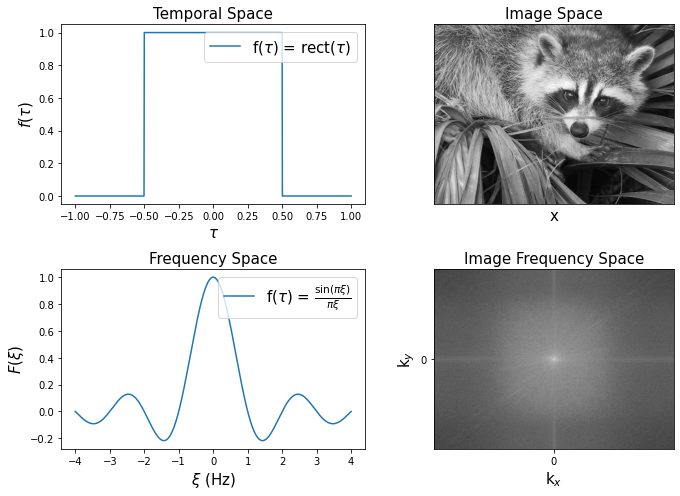

In [32]:
#@title
fig_ft_examples, axs_ft_examples = pl.subplots(2, 2, figsize = (10, 7))

# First deomnstrate the top-hat function and its Fourier Transform
a = 0.5
x_ft_examples = np.linspace(-2*a, 2*a, 1000)
top_hat = 1 * (np.abs(x_ft_examples) < a)
axs_ft_examples[0, 0].plot(x_ft_examples, top_hat, label = r'f($\tau$) = rect($\tau$)')
axs_ft_examples[0, 0].set_xlabel(r'$\tau$', fontsize = 15), axs_ft_examples[0, 0].set_ylabel(r'$f(\tau)$', fontsize = 15)
axs_ft_examples[0, 0].set_title('Temporal Space', fontsize = 15)
axs_ft_examples[0, 0].legend(loc=1, fontsize = 15)

# The fourier trsanform of the top-hat is the sinc function
f_ft_examples = np.linspace(-4, 4, 1000)
sinc = np.sin(2*np.pi*f_ft_examples*a) / (np.pi * f_ft_examples)
axs_ft_examples[1, 0].plot(f_ft_examples, sinc, label = r'f($\tau$) = $\frac{\sin(\pi\xi)}{\pi\xi}$')
axs_ft_examples[1, 0].set_xlabel(r'$\xi$ (Hz)', fontsize = 15), axs_ft_examples[1, 0].set_ylabel(r'$F(\xi)$', fontsize = 15)
axs_ft_examples[1, 0].set_title('Frequency Space', fontsize = 15)
axs_ft_examples[1, 0].legend(loc=1, fontsize = 15)

# Now use the FFT to determine the Fourier Transform of an image
face_R = face[:, :, 0]
axs_ft_examples[0, 1].imshow(face_R, cmap = 'gray')
axs_ft_examples[0, 1].set_xticks([]), axs_ft_examples[0, 1].set_yticks([])
axs_ft_examples[0, 1].set_xlabel(r'x', fontsize = 15), axs_ft_examples[1, 1].set_ylabel(r'y', fontsize = 15);
axs_ft_examples[0, 1].set_title('Image Space', fontsize = 15)

# Find the FFT of the face image (red channel)
face_FFT = fft.fft2(face_R)

# Find the logarithm of power spectrum of the face image
face_PS = np.log(np.abs(face_FFT))

# Shift the PS to ensure is is zero-centered
face_ZC = fft.fftshift(face_PS
                      )
axs_ft_examples[1, 1].imshow(face_ZC, cmap = 'gray', extent = (-face_R.shape[1]/2, face_R.shape[1]/2, -face_R.shape[0]/2, face_R.shape[0]/2))
axs_ft_examples[1, 1].set_xticks([0.0]), axs_ft_examples[1, 1].set_yticks([0.0])
axs_ft_examples[1, 1].set_xlabel(r'k$_{x}$', fontsize = 15), axs_ft_examples[1, 1].set_ylabel(r'k$_{y}$', fontsize = 15)
axs_ft_examples[1, 1].set_title('Image Frequency Space', fontsize = 15)

pl.tight_layout()
pl.show()

### Properties of the Fourier Transform

#### Linearity
For any complex numbers $a$ and $b$
$$
\text{FT}\{af(\tau) + bg(\tau)\} = aF(\xi) + bG(\xi)
$$
#### Time Shift
For any real number $\alpha$
$$
\text{FT}\{f(\tau \pm \alpha)\} = e^{\mp i 2\pi \alpha\xi} \cdot F(\xi)
$$
#### Frequency Shift
For any real number $\beta$
$$
\text{FT}^{-1}\{F(\xi \pm \beta)\} = e^{\mp i 2\pi \beta\tau} \cdot f(\tau)
$$
#### Time Scaling
For any non-zero real value $\alpha$
$$
\text{FT}\{f(\alpha\cdot\tau)\} = \frac{1}{\alpha}\cdot F\left(\frac{\xi}{\alpha}\right)
$$
#### Differentiation
If $f(\tau)$ is a differentiable function then:
$$
\text{FT}\left\{\frac{\partial}{\partial\tau}f(\tau)\right\} = e^{i2\pi\xi}F(\xi)
$$<br>
(this fact can be used to help solve many complicated differential equations)

### Convolution Theorem

Consider two functions $f(\tau)$ and $g(\tau)$, and their respective Fourier transforms $F(\xi)$ and $G(\xi)$.  The fourier transform of the convolution of both functions equals the product of the repsective Fourier trasnforms and vice-versa:<br><br>
$$
\text{FT}\{f(\tau) \circledast g(\tau) \} = F(\xi)\cdot G(\xi)\qquad and \qquad \text{FT}^{-1}\{F(\xi) \circledast G(\xi) \} = f(\tau)\cdot g(\tau)
$$